# ta-target-mean

Mean instead of range 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("../data/BTCUSDT-hour-features.csv")

In [71]:
def get_target(span=200):
    """
    adds target to df. Target formula:
    w = next 200 hours
    close - (((max(w) - min(w))/2)+min(w))
    """
    acc = []
    df_len = len(df["close"])

    for i in range(len(df["close"])):

        if i+span < df_len:
            m = np.mean(df["close"][i+1:i+span])
            acc.append(m-df["close"][i])
        else:
            acc.append(None)

    return acc
        
        


In [72]:
df["close"][0:100]

0     4309.69
1     4312.00
2     4305.00
3     4394.36
4     4447.31
       ...   
95    4368.50
96    4408.08
97    4580.00
98    4545.87
99    4570.00
Name: close, Length: 100, dtype: float64

In [73]:
df["target"] = get_target()

In [74]:
df["ln_close"] = np.log(df["close"])

In [75]:
def divide(x, y):
    """divides x and y, returns None if either are None"""
    if not isinstance(x, float) or not isinstance(y, float) or y == 0:
        return None
    else:
        return x/y

def abs_ln(x):
    """returns ln, and -ln(abs(x)) if x is negative"""
    return np.log(abs(x)) if x>0 else -np.log(abs(x))


In [76]:
a = list(map(abs_ln, df["target"]))
b = np.log(df["close"])


In [77]:
df["target_new"] = list(map(divide, a, b)) 

In [78]:
def cutoff(low:float, high:float):
    """if target_new is within bounds, returns 0"""
    df["target_new"] = list(map(lambda x: 0 if low<x<high else 1 if x>0 else -1, df["target_new"]))

In [79]:
cutoff(-100.6, 0.7)

In [80]:
df_short = df[24000:28000]

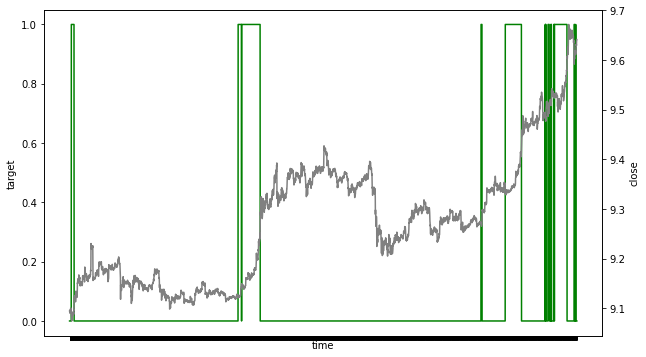

In [82]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.plot(df_short.timestamp,
         df_short.target_new,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
# ax.axes.xaxis.set_visible(False)

ax2=ax.twinx()
ax2.plot(df_short.timestamp,
         df_short.ln_close,
         color="gray")
ax2.set_ylabel("close")
plt.show()

In [81]:
df.to_csv("../data/BTCUSDT-hour-target-classification.csv", index=False)

In [68]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_bbw,bb_bbp,atr,target,ln_close,target_new
0,2017-08-25 12:00:00.000,4361.27,4361.27,4261.13,4309.69,110.998609,1503665999999,479266.243589,1891.0,7.918988,...,4410.014255,4182.823745,0.0,0.0,5.287904,0.558414,57.330282,173.445578,8.368621,0
1,2017-08-25 13:00:00.000,4311.69,4345.00,4297.66,4312.00,20.801018,1503669599999,89785.160922,188.0,4.482264,...,4404.864512,4200.355488,0.0,0.0,4.753139,0.545915,56.616690,171.332513,8.369157,0
2,2017-08-25 14:00:00.000,4303.82,4340.00,4291.52,4305.00,10.610266,1503673199999,45804.268023,139.0,6.107378,...,4401.965291,4211.654709,0.0,0.0,4.418829,0.490489,56.035498,178.305025,8.367532,0
3,2017-08-25 15:00:00.000,4321.50,4422.29,4321.50,4394.36,21.796763,1503676799999,95349.335161,189.0,5.421801,...,4408.584109,4222.864891,0.0,0.0,4.303315,0.923411,60.410820,88.998492,8.388077,0
4,2017-08-25 16:00:00.000,4394.36,4453.91,4375.29,4447.31,17.784780,1503680399999,78475.084397,179.0,3.762923,...,4420.360065,4236.469935,1.0,0.0,4.248440,1.146555,61.711475,36.173266,8.400055,0
